In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


## Random Undersamppling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the training data
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

In [ ]:
"""
# Convert NumPy arrays to Pandas DataFrames
x_train_resampled = pd.DataFrame(x_train_resampled)
y_train_resampled = pd.DataFrame(y_train_resampled)

# Save undersampled data
x_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/x_train_resampled(RUS).csv', index=False)
y_train_resampled.to_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/y_train_resampled(RUS).csv', index=False)
"""

In [ ]:
# Load oversampled data
x_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/x_train_resampled(RUS).csv')
y_train_resampled = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/y_train_resampled(RUS).csv')

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train_resampled == 0)
class_1_count = np.sum(y_train_resampled == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    15545
dtype: int64
Class 1 count: 0    15545
dtype: int64


In [ ]:
import copy

x_train = copy.deepcopy(x_train_resampled) # Copying oversampled input data
y_train = copy.deepcopy(y_train_resampled) # Copying oversampled target data

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 0    15545
dtype: int64
Class 1 count: 0    15545
dtype: int64


In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

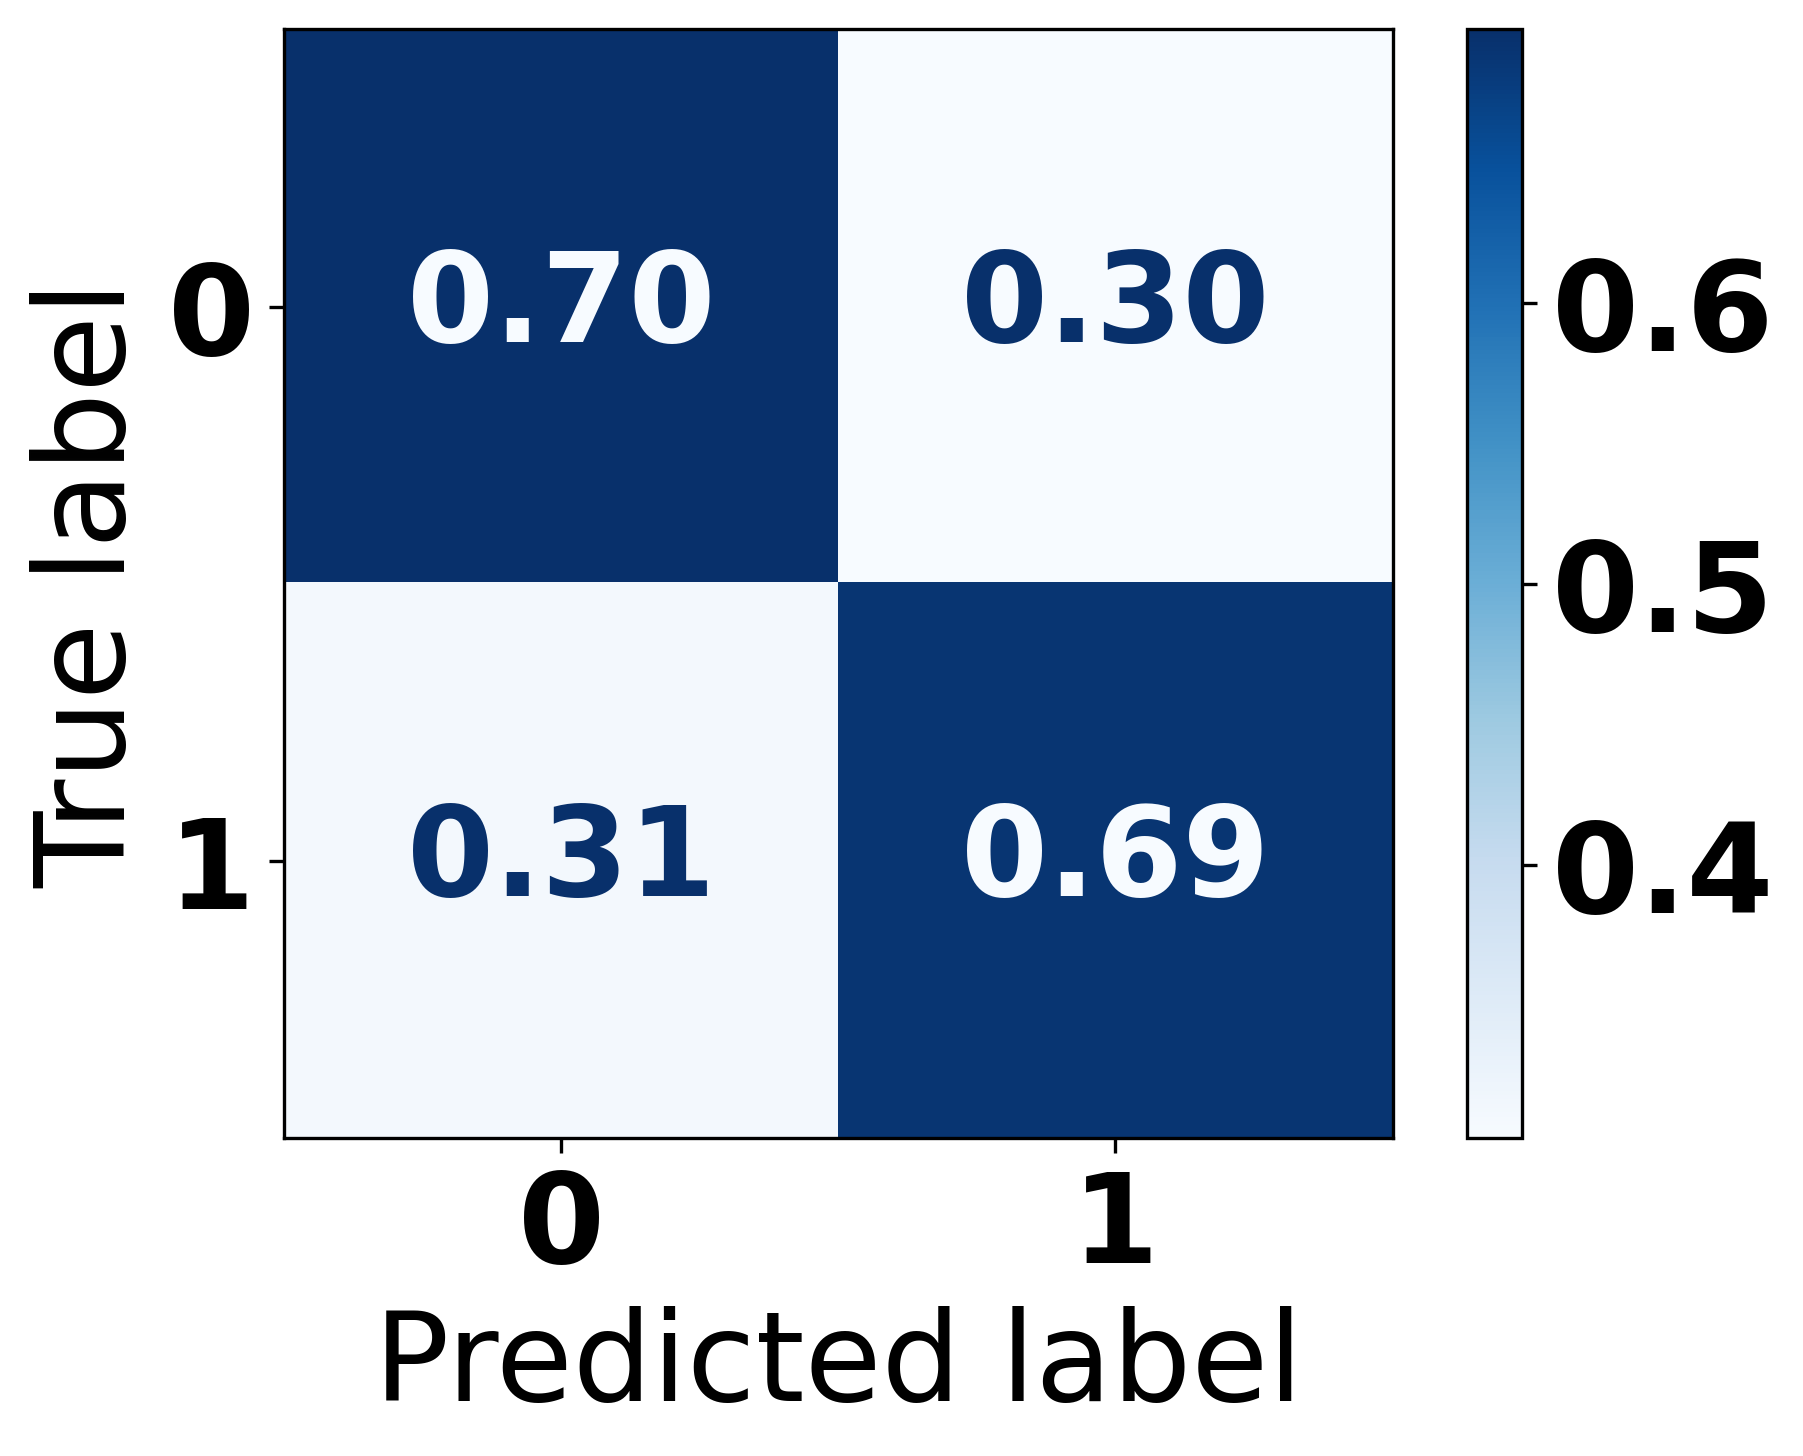

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.70      0.81    110005
     Class 1       0.12      0.69      0.21      6663

    accuracy                           0.70    116668
   macro avg       0.55      0.69      0.51    116668
weighted avg       0.93      0.70      0.78    116668

Train Accuracy: 0.999742682534577
Test Accuracy: 0.6969348921726609


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


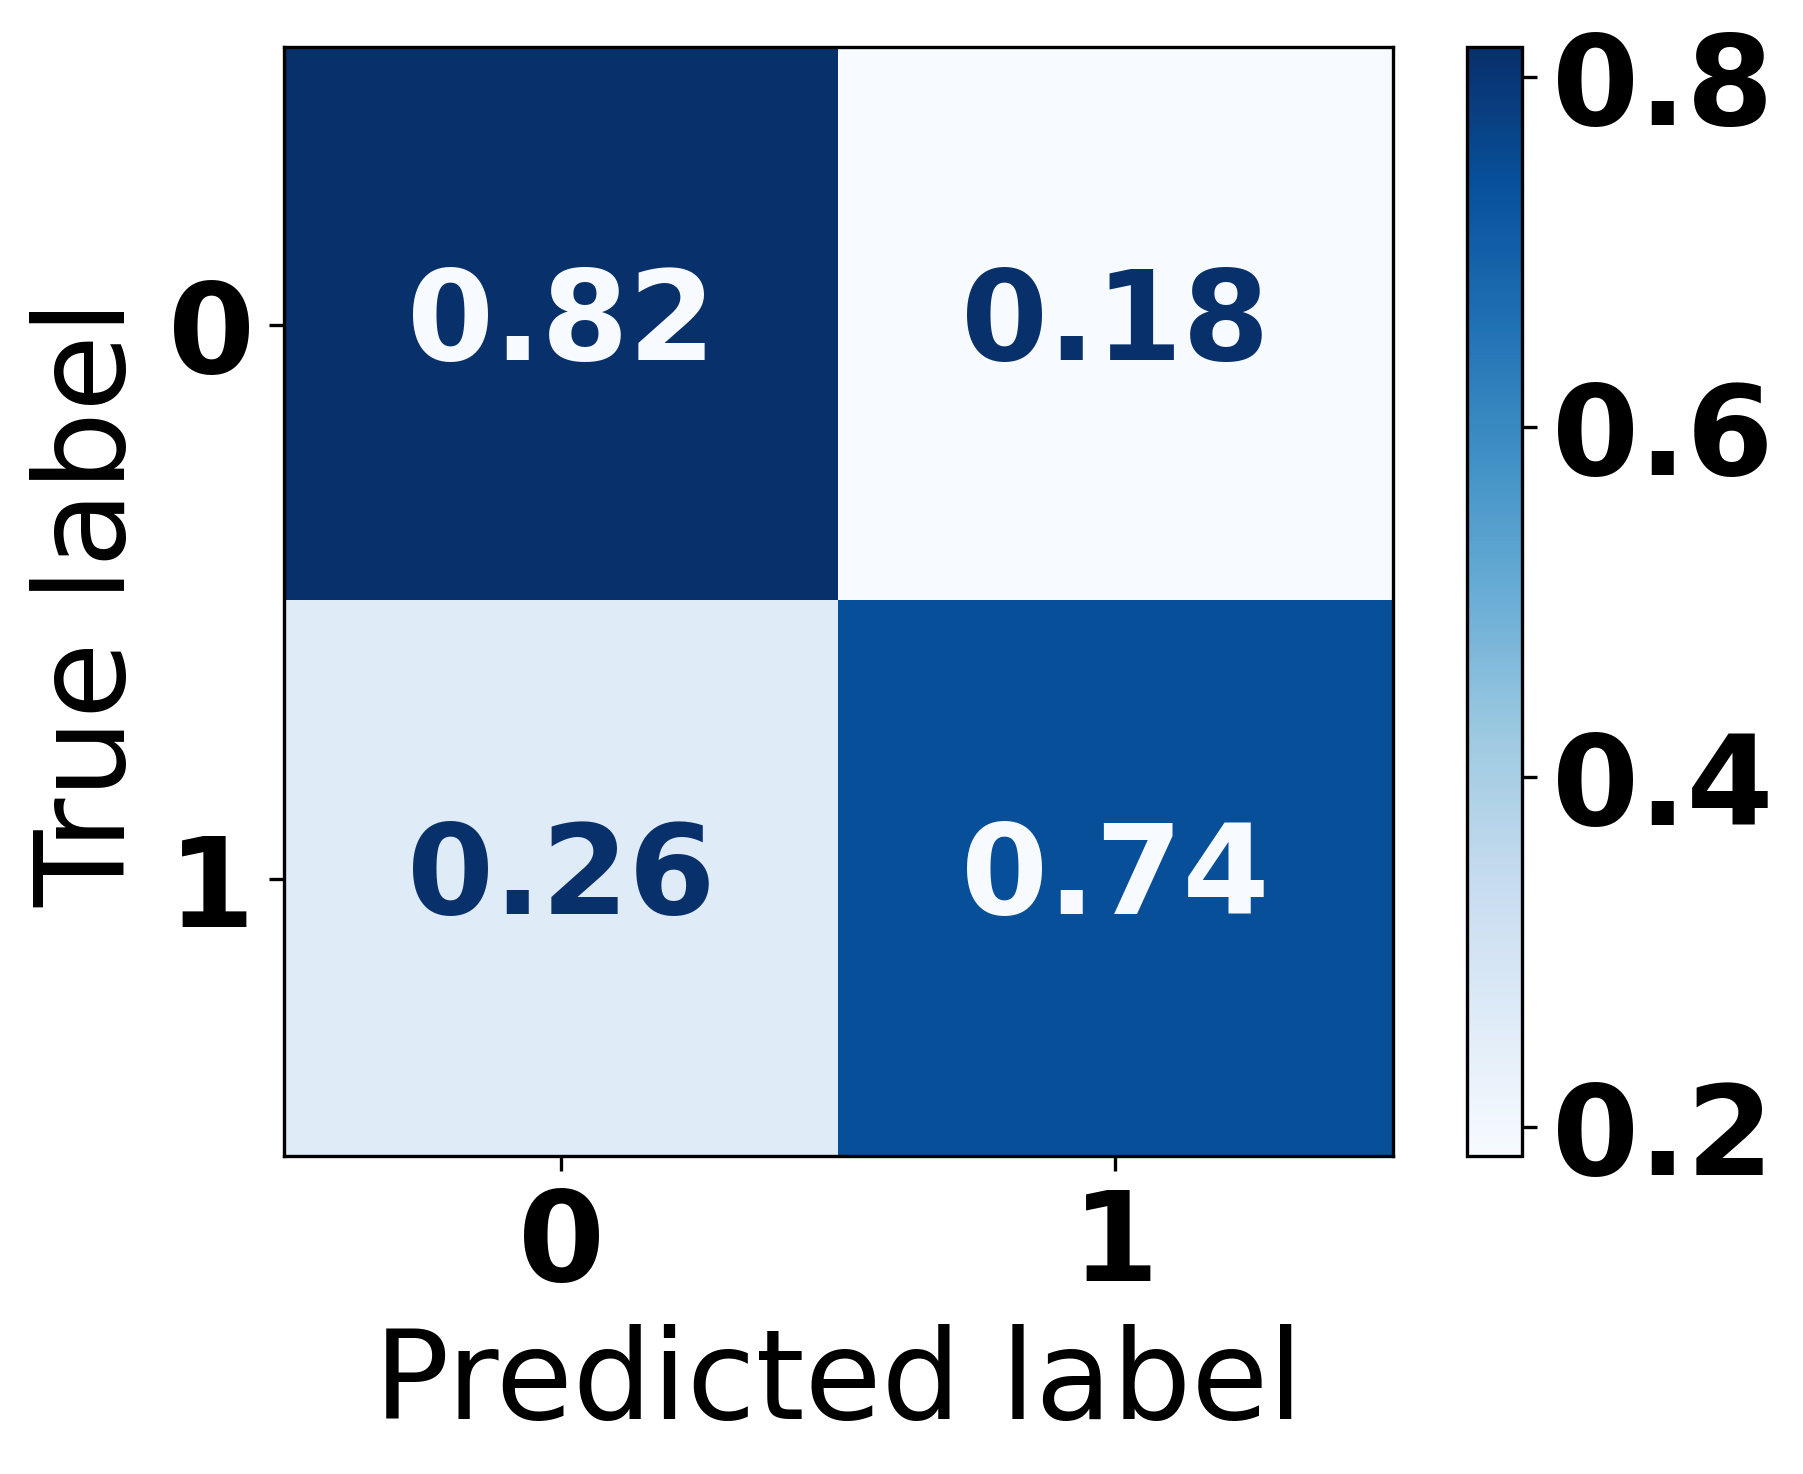

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.82      0.89    110005
     Class 1       0.20      0.74      0.31      6663

    accuracy                           0.81    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.81      0.86    116668

Train Accuracy: 0.7775490511418462
Test Accuracy: 0.8123907155346796


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

<ipython-input-27-2417d1570aca>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = RF.fit(x_train, y_train).predict(x_test)


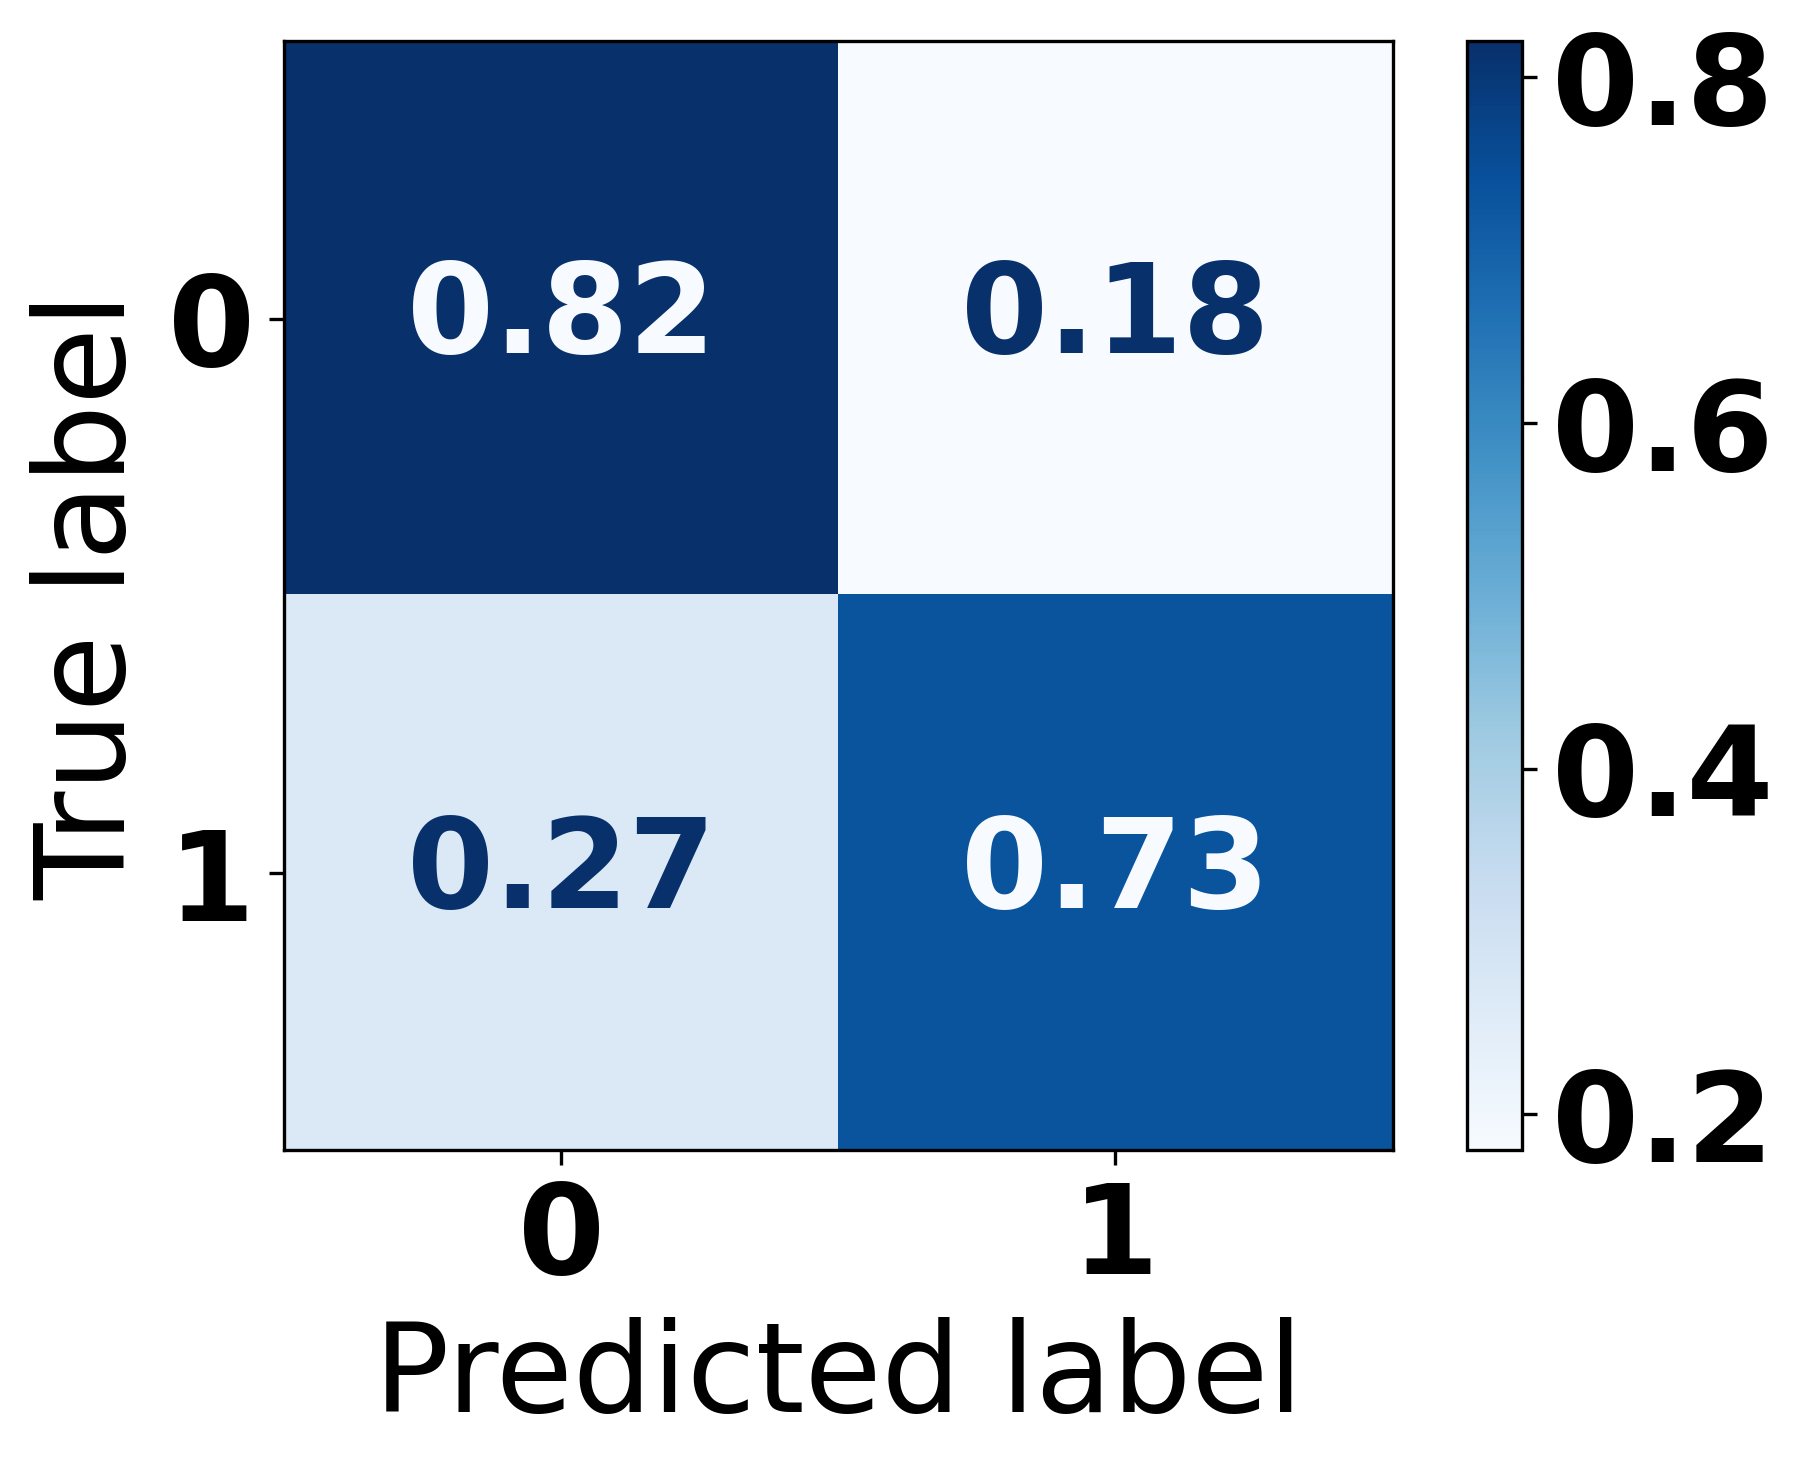

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    110005
           1       0.20      0.73      0.31      6663

    accuracy                           0.82    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.82      0.86    116668

Train Accuracy: 0.7740109359922804
Test Accuracy: 0.815716391812665


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


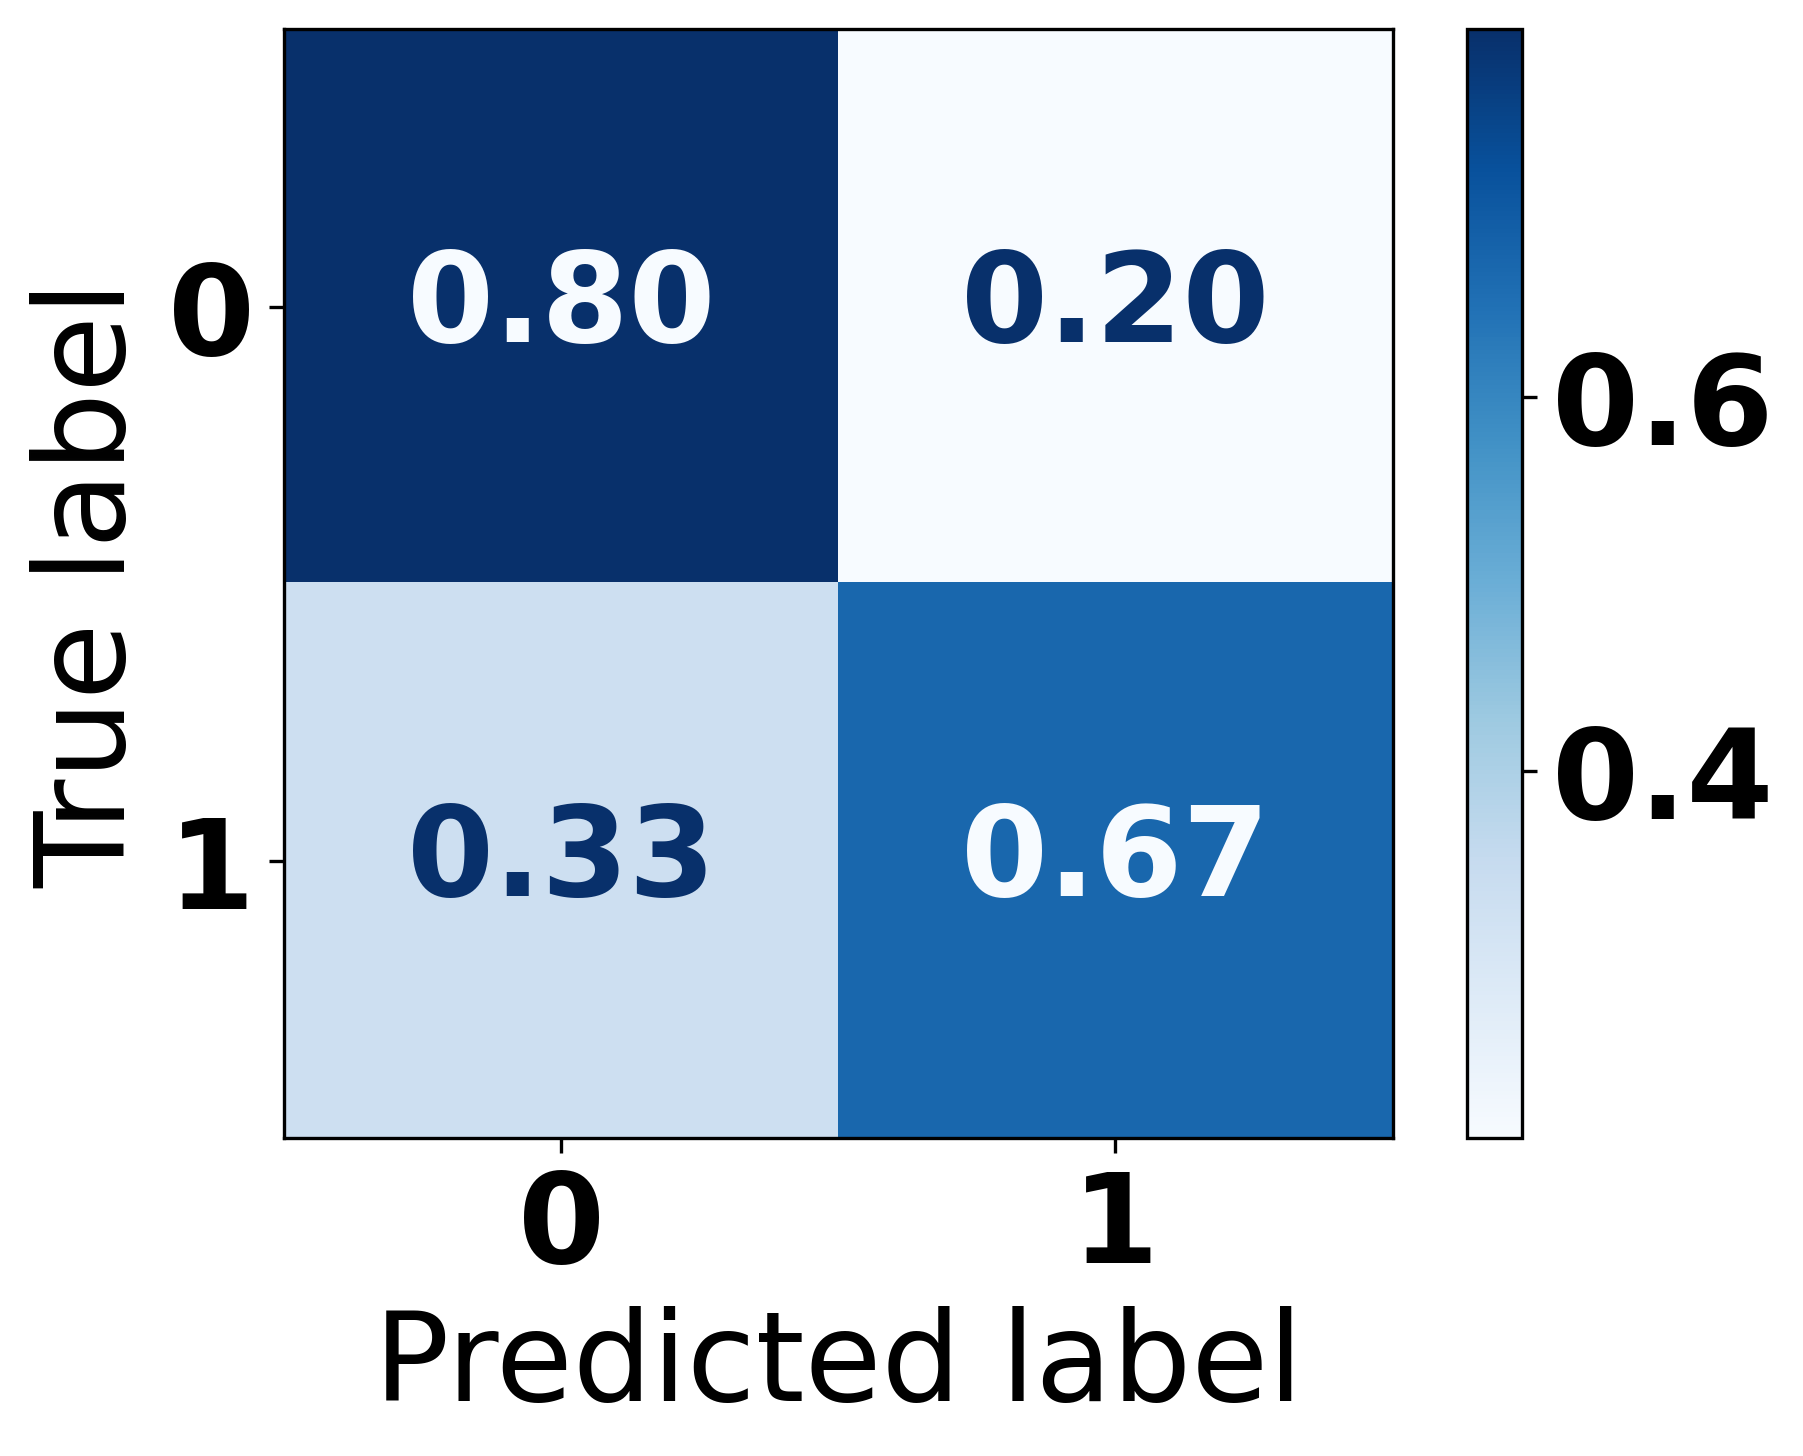

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88    110005
           1       0.17      0.67      0.27      6663

    accuracy                           0.79    116668
   macro avg       0.57      0.73      0.57    116668
weighted avg       0.93      0.79      0.84    116668

Train Accuracy: 0.7341267288517208
Test Accuracy: 0.7891452669112353


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


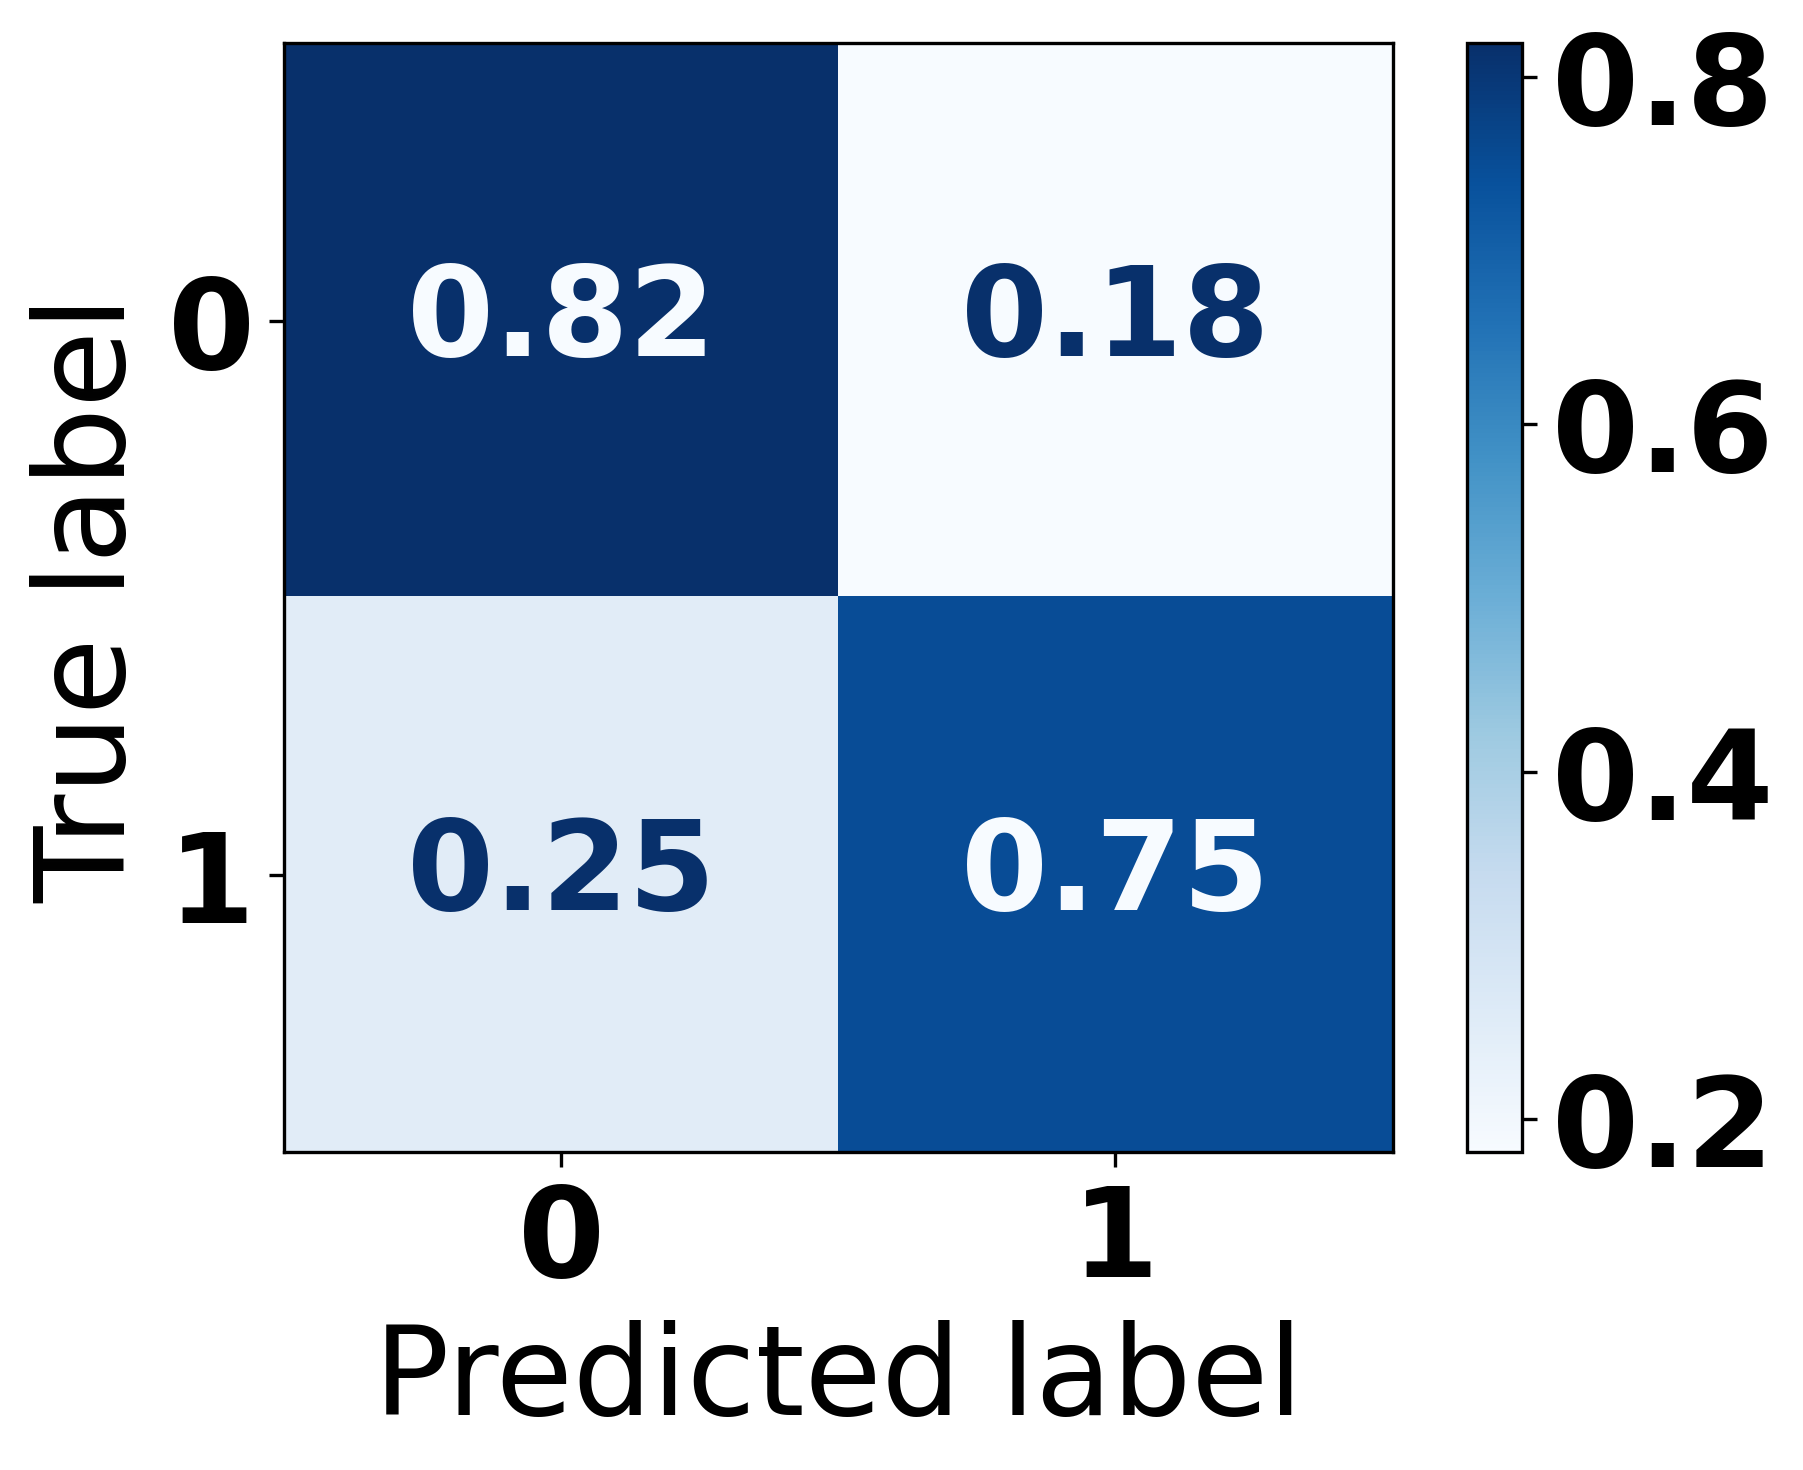

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89    110005
           1       0.20      0.75      0.32      6663

    accuracy                           0.82    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.82      0.86    116668

Train Accuracy: 0.7824702476680605
Test Accuracy: 0.8150906846778894


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=17, learning_rate=0.4, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

### Deep Learning Approach

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.81592655 0.18407345]
 [0.24823653 0.75176347]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.82      0.89    110005
     Class 1       0.20      0.75      0.31      6663

    accuracy                           0.81    116668
   macro avg       0.59      0.78      0.60    116668
weighted avg       0.94      0.81      0.86    116668



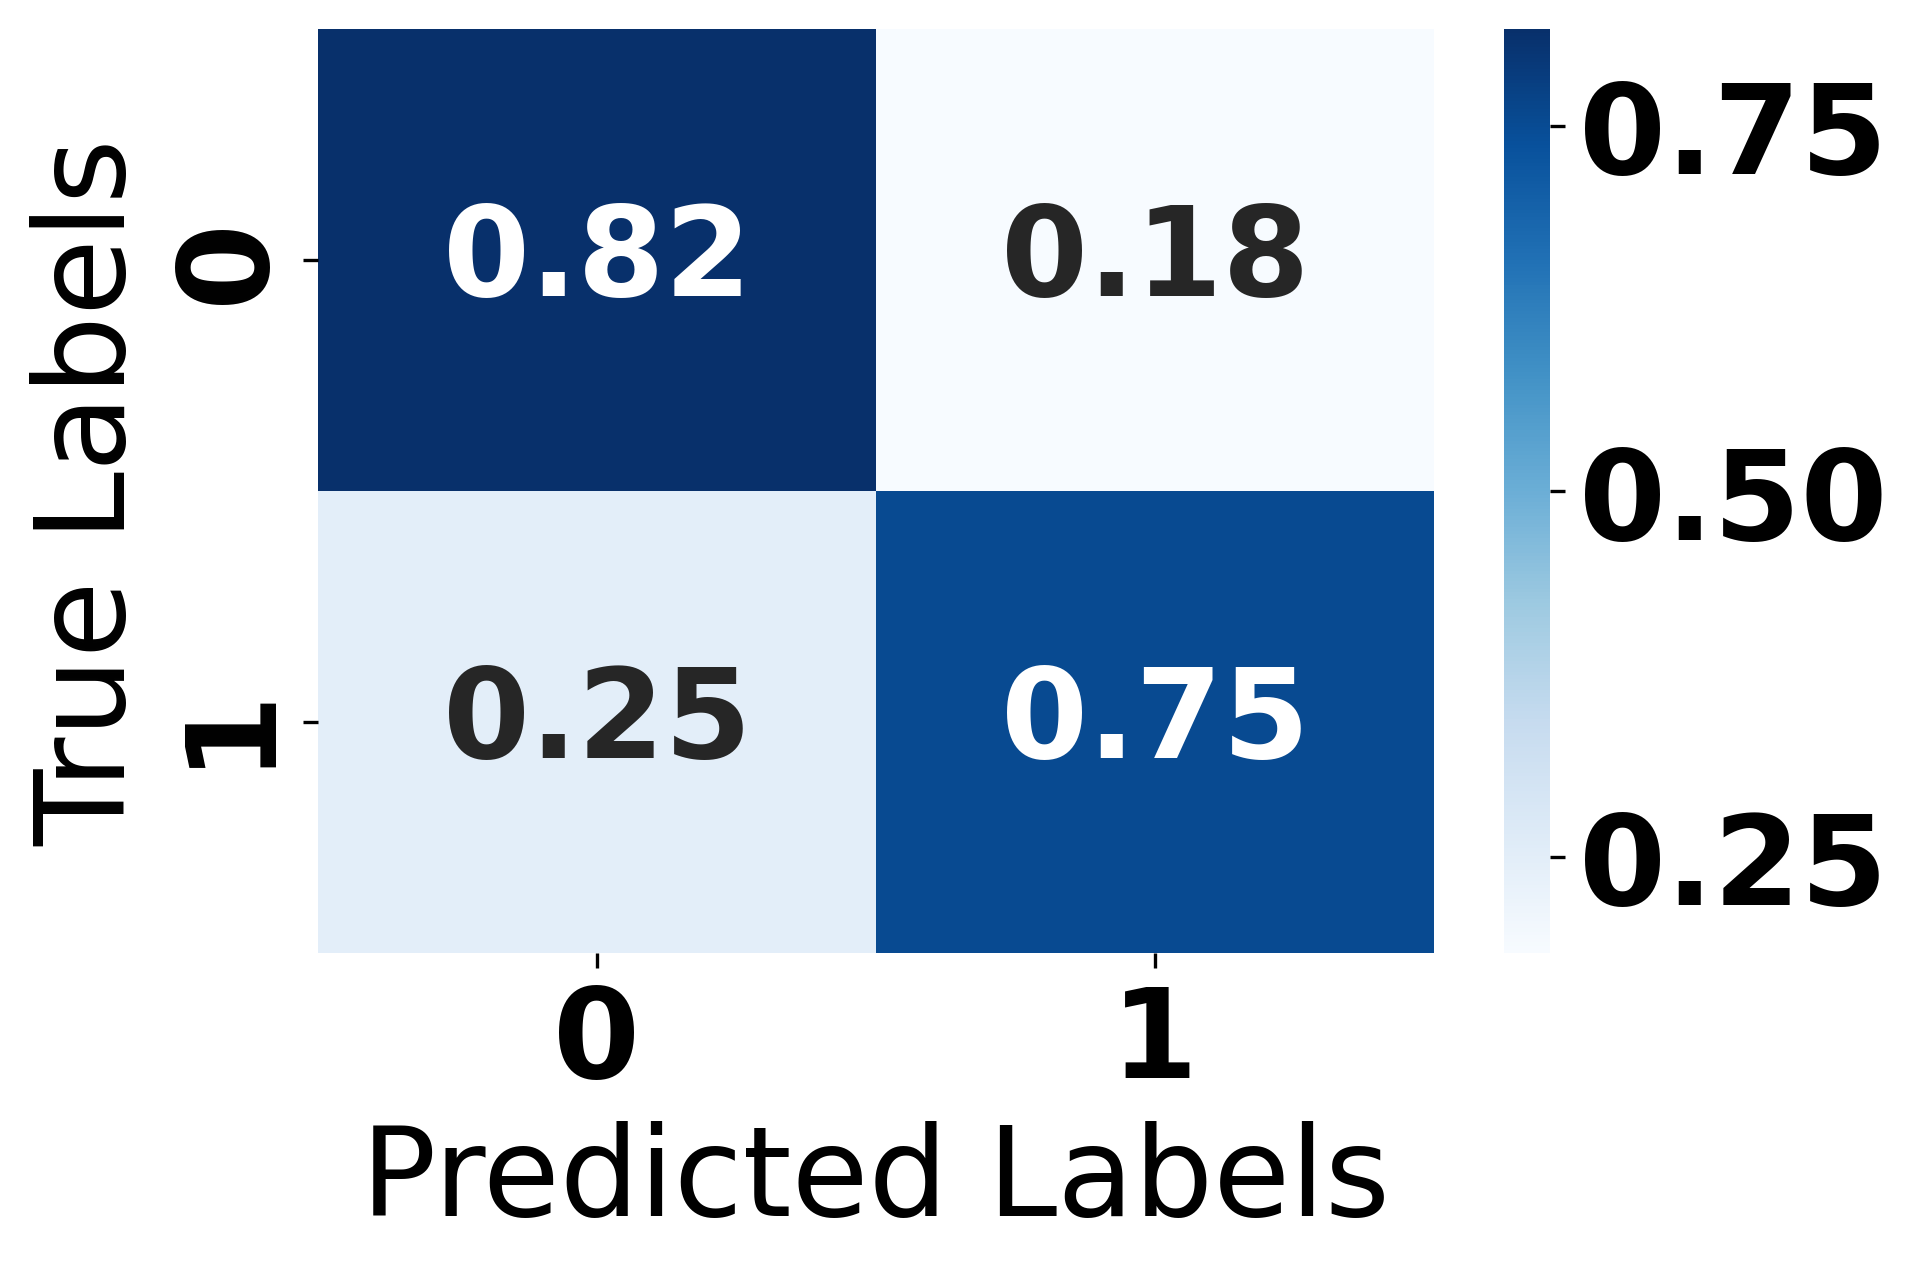

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
243/243 [==============================] - 16s 60ms/step - loss: 0.5792 - accuracy: 0.7295 - val_loss: 0.4982 - val_accuracy: 0.7894
Epoch 2/10
243/243 [==============================] - 14s 58ms/step - loss: 0.4976 - accuracy: 0.7639 - val_loss: 0.3699 - val_accuracy: 0.8506
Epoch 3/10
243/243 [==============================] - 14s 59ms/step - loss: 0.4841 - accuracy: 0.7718 - val_loss: 0.5627 - val_accuracy: 0.7309
Epoch 4/10
243/243 [==============================] - 10s 41ms/step - loss: 0.4795 - accuracy: 0.7729 - val_loss: 0.4505 - val_accuracy: 0.8081
Epoch 5/10
243/243 [==============================] - 9s 37ms/step - loss: 0.4718 - accuracy: 0.7775 - val_loss: 0.5263 - val_accuracy: 0.7628
Epoch 6/10
243/243 [==============================] - 10s 42ms/step - loss: 0.4671 - accuracy: 0.7812 - val_loss: 0.4460 - val_accuracy: 0.8023
Epoch 7/10
243/243 [==============================] - 10s 41ms/step - loss: 0.4630 - accuracy: 0.7843 - val_loss: 0.4466 - val_accuracy: 

3646/3646 [==============================] - 12s 3ms/step
Normalized Confusion Matrix:
[[0.76692878 0.23307122]
 [0.19510731 0.80489269]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.77      0.86    110005
     Class 1       0.17      0.80      0.28      6663

    accuracy                           0.77    116668
   macro avg       0.58      0.79      0.57    116668
weighted avg       0.94      0.77      0.83    116668



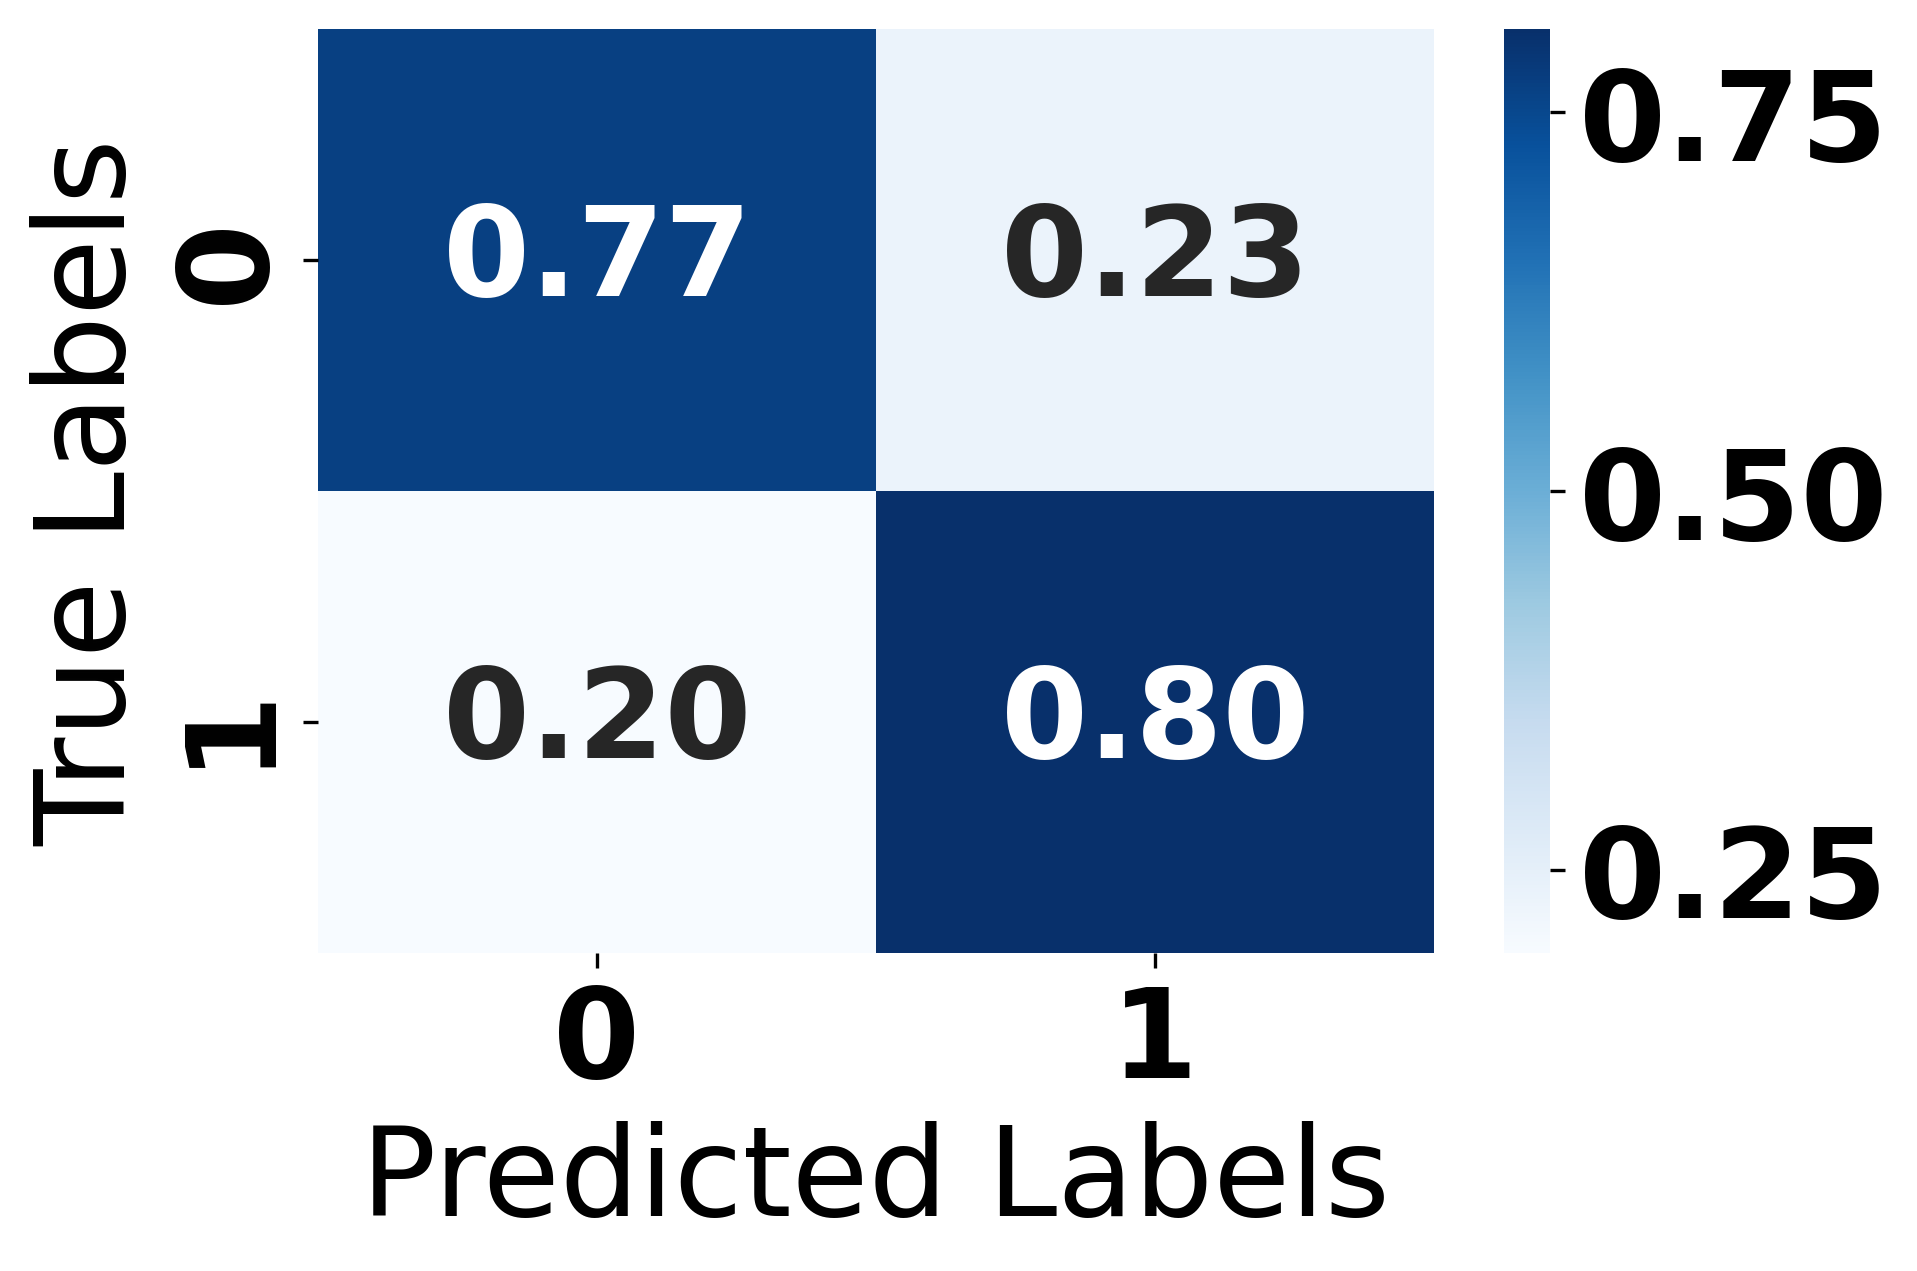

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/model/CNN(RUS).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/MyDrive/Cognition Dysfunction/Dataset/RUS/model/CNN(RUS).h5')

3646/3646 [==============================] - 11s 3ms/step
Normalized Confusion Matrix:
[[0.78080996 0.21919004]
 [0.20561309 0.79438691]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.78      0.87    110005
     Class 1       0.18      0.79      0.29      6663

    accuracy                           0.78    116668
   macro avg       0.58      0.79      0.58    116668
weighted avg       0.94      0.78      0.84    116668



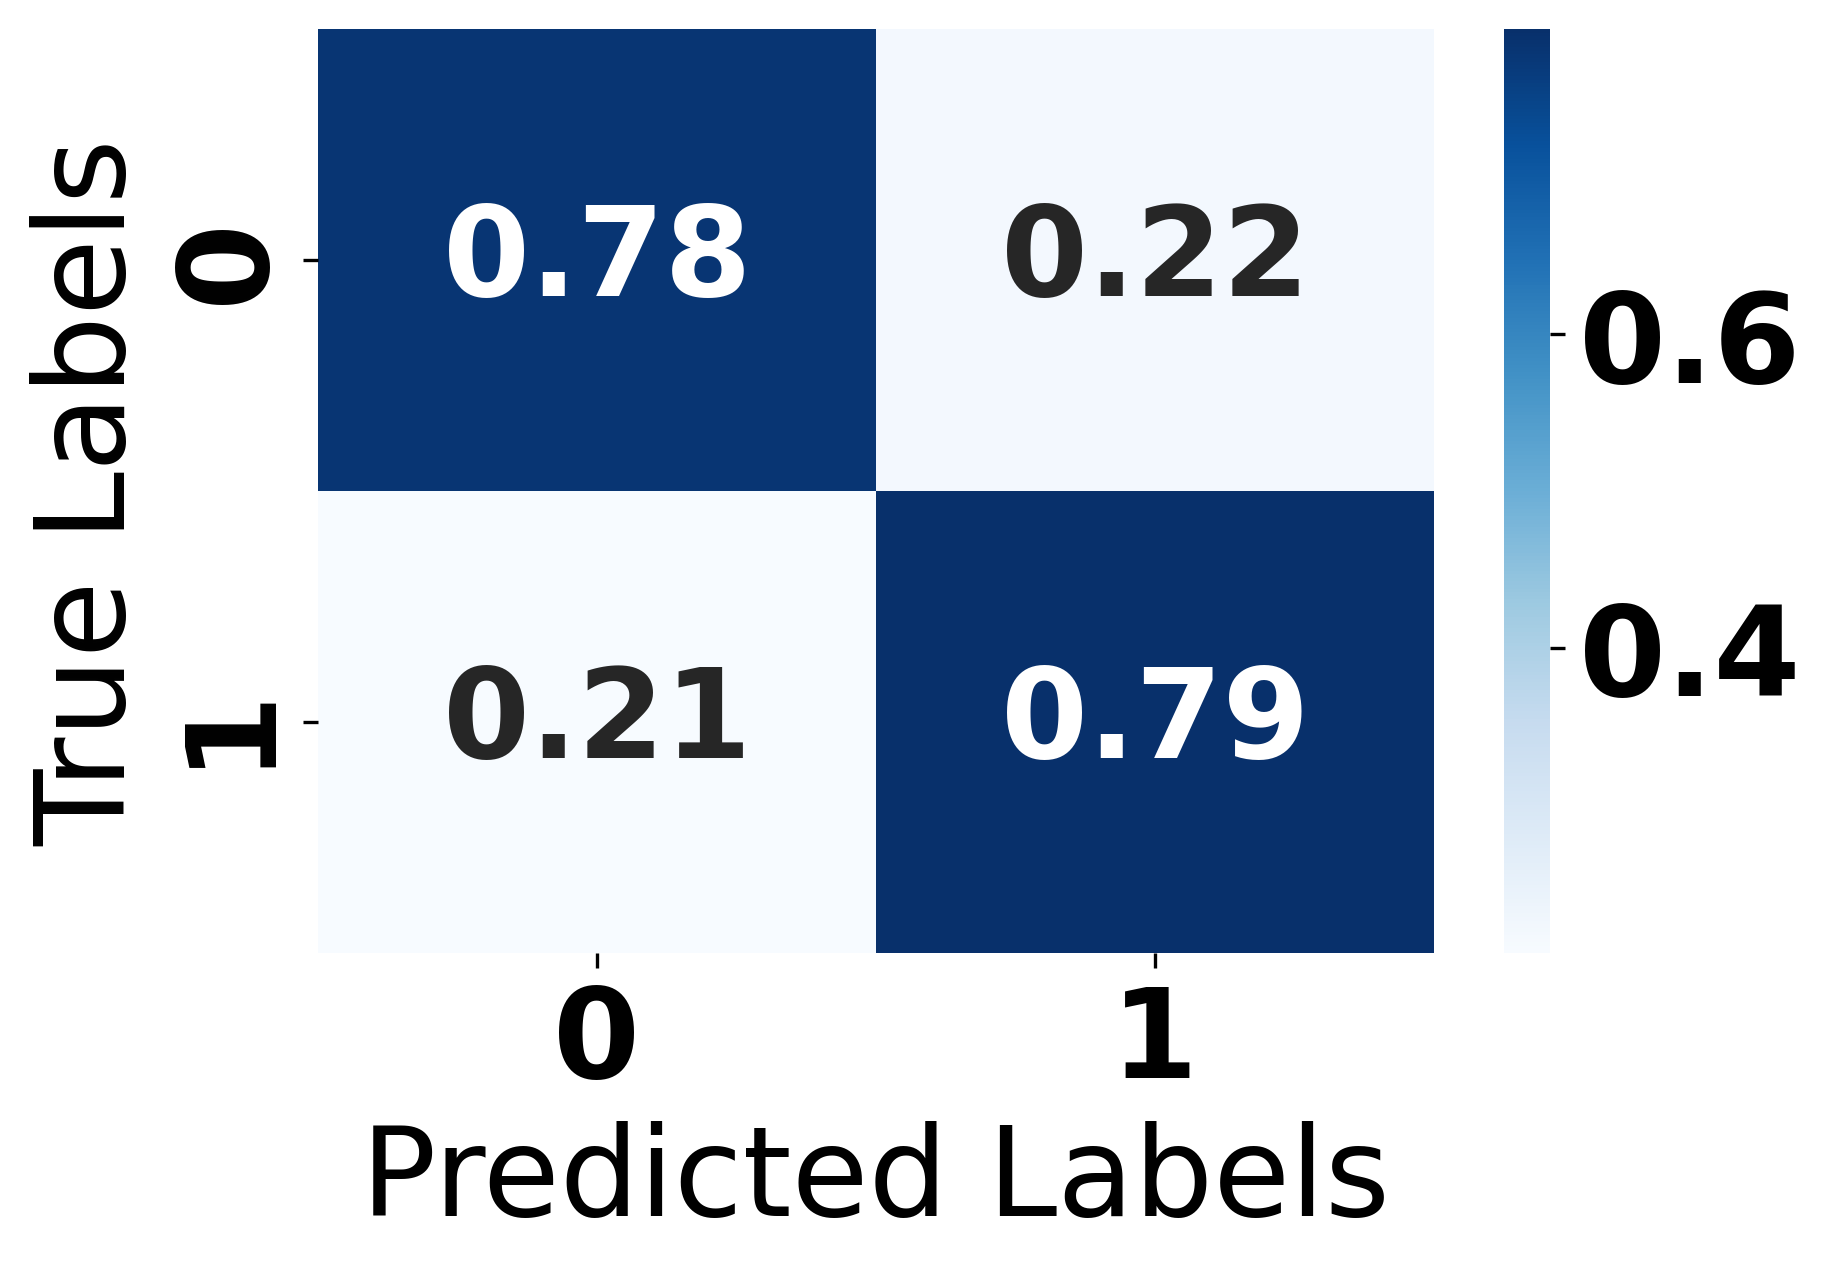

In [ ]:
# Predict probabilities on test data
y_pred_prob = CNN.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.52, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
243/243 [==============================] - 9s 17ms/step - loss: 0.5657 - accuracy: 0.7249 - val_loss: 0.3967 - val_accuracy: 0.8240
Epoch 2/10
243/243 [==============================] - 3s 13ms/step - loss: 0.5117 - accuracy: 0.7539 - val_loss: 0.4253 - val_accuracy: 0.8207
Epoch 3/10
243/243 [==============================] - 4s 16ms/step - loss: 0.4928 - accuracy: 0.7661 - val_loss: 0.4053 - val_accuracy: 0.8325
Epoch 4/10
243/243 [==============================] - 4s 16ms/step - loss: 0.4814 - accuracy: 0.7732 - val_loss: 0.3663 - val_accuracy: 0.8589
Epoch 5/10
243/243 [==============================] - 4s 15ms/step - loss: 0.4777 - accuracy: 0.7765 - val_loss: 0.3838 - val_accuracy: 0.8367
Epoch 6/10
243/243 [==============================] - 3s 13ms/step - loss: 0.4737 - accuracy: 0.7785 - val_loss: 0.5020 - val_accuracy: 0.7759
Epoch 7/10
243/243 [==============================] - 4s 16ms/step - loss: 0.4731 - accuracy: 0.7795 - val_loss: 0.4049 - val_accuracy: 0.8400

3646/3646 [==============================] - 6s 2ms/step
Normalized Confusion Matrix:
[[0.77249216 0.22750784]
 [0.19555756 0.80444244]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.77      0.87    110005
     Class 1       0.18      0.80      0.29      6663

    accuracy                           0.77    116668
   macro avg       0.58      0.79      0.58    116668
weighted avg       0.94      0.77      0.83    116668



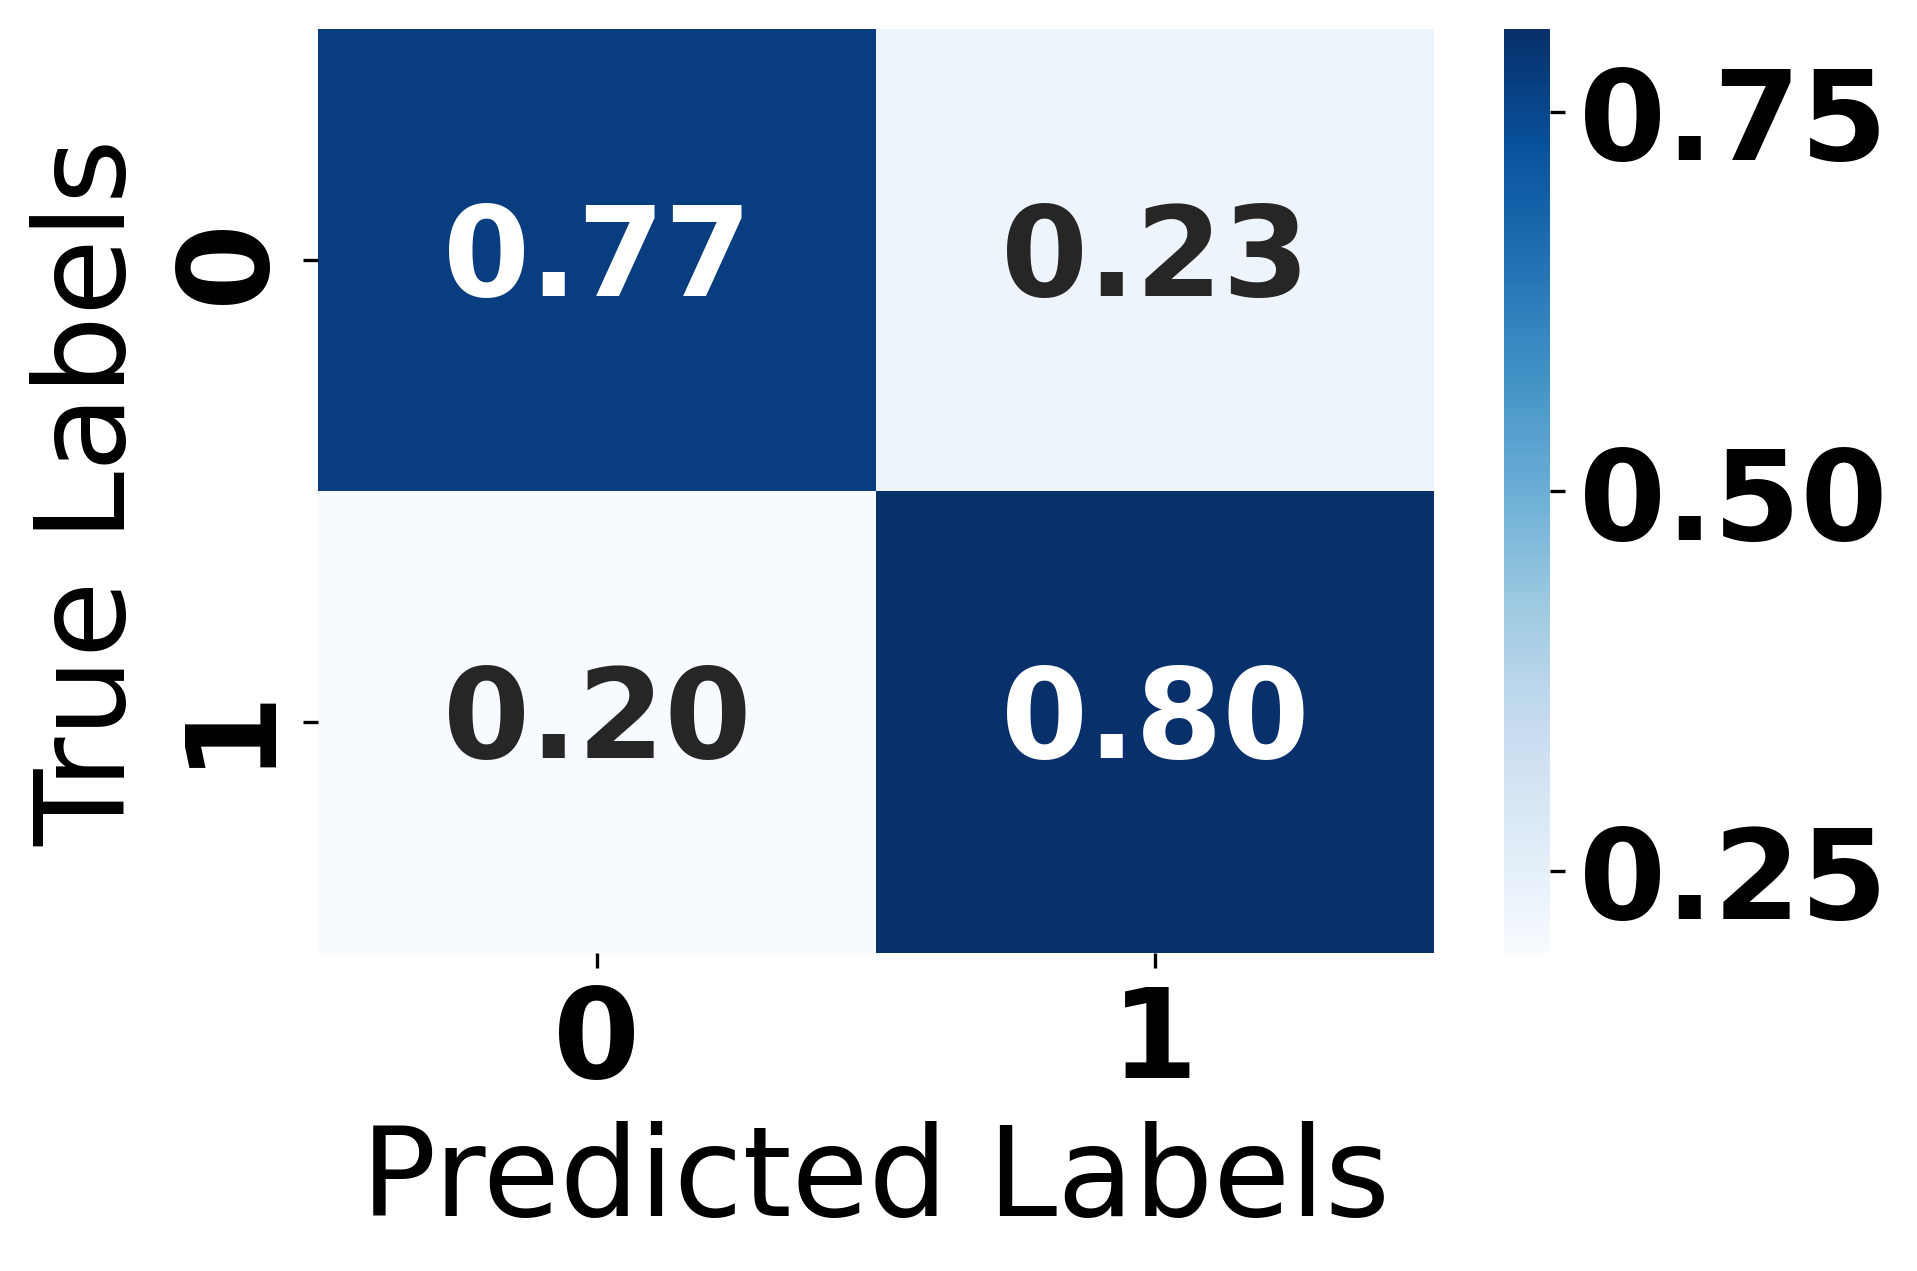

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()